In [1]:
# Test plotting with basemap
import pandas as pd
import os
import numpy as np
import shapely as sp
from os.path import join as opj

import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
# from mpl_toolkits.basemap import Basemap
#CALIFORNIA BOUNDING BOX westlimit=-124.48; southlimit=32.53; eastlimit=-114.13; northlimit=42.01
%matplotlib inline

from biomass_preprocessing import MergeInventoryAndCounty

DATA_DIR = "/Users/anayahall/projects/compopt/data"
OUT_DIR = "/Users/anayahall/projects/compopt/maps"

CA = gpd.read_file(opj(DATA_DIR, "raw/CA_Counties/CA_Counties_TIGER2016.shp"))
CA = CA.to_crs(epsg=4326)
CA['COUNTY'] = CA['NAME']
# print("Ca_proj crs: ", CA_proj.crs)
CA.head()

# LOAD BIOMASS DATA
gbm_pts, tbm_pts = MergeInventoryAndCounty(
    gross_inventory     = opj(DATA_DIR, "raw/biomass.inventory.csv"),
    technical_inventory = opj(DATA_DIR, "raw/biomass.inventory.technical.csv"),
    county_shapefile    = opj(DATA_DIR, "raw/CA_Counties/CA_Counties_TIGER2016.shp"),
    fips_data           = opj(DATA_DIR, "interim/CA_FIPS.csv")
)
counties = tbm_pts[tbm_pts['year'] == 2014] # could change to GBM

ej = gpd.read_file(opj(DATA_DIR, "calenviroscreen/CESJune2018Update_SHP/CES3June2018Update.shp"))


rangelands = gpd.read_file(opj(DATA_DIR, "raw/CA_FMMP_G/gl_bycounty/grazingland_county.shp"))
# rangelands = gpd.read_file(opj(DATA_DIR, "raw/CA_FMMP_G/grazingland_dis/CA_grazingland.shp"))
rangelands = rangelands.to_crs(epsg=4326)

swis =  gpd.read_file(opj(DATA_DIR, "clean/clean_swis.shp"))


merging biomass data with CA shapefile county centroids
p BIOMASS PRE_PROCESSING DONE RUNNING


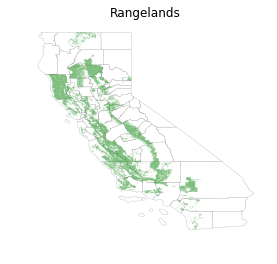

In [2]:
f, ax = plt.subplots()
CA.plot(ax = ax, color = "white", figsize = (10,10), linewidth=0.2, edgecolor = "grey")
rangelands.plot(ax= ax, color = "green", alpha = .5)
ax.axis('off')
ax.set_title('Rangelands', fontdict={'fontsize': '12', 'fontweight' : '3'})
plt.savefig(opj(OUT_DIR, "rangelands.png"), dpi=300)

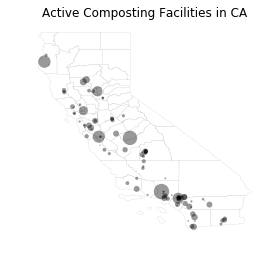

In [3]:
f, ax = plt.subplots()
CA.plot(ax = ax, color = "white", figsize = (10,10), linewidth=0.1, edgecolor = "grey")
swis.plot(ax = ax, markersize = swis.cap_m3/3000, marker = 'o', color = 'black', alpha=.4, linewidth=0)
ax.axis('off')
ax.set_title('Active Composting Facilities in CA', fontdict={'fontsize': '12', 'fontweight' : '3'})
# plt.savefig("maps/FacilitiesbyCapacity.png", dpi=300)

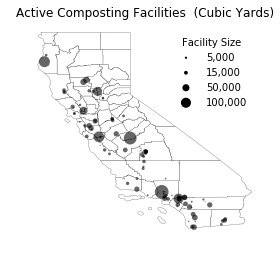

In [4]:
plotvar = swis['cap_m3']*1.30795

# before plotting prep legend
c = []
for i in [10, 25, 50, 75]:
    c.append(int(round(np.percentile(plotvar, i), -3)))

# Map Capacity by County
f, ax = plt.subplots(1)
CA.plot(ax = ax, color = "white", figsize = (10,10), linewidth=0.2, edgecolor = "black")
# capmap.plot(ax = ax, column = plotvar, cmap = "Oranges", legend = True)
swis.set_geometry('geometry').plot(ax = ax, markersize = plotvar/5000, marker = 'o', 
                                  legend = True, color = 'black', alpha=.6, linewidth=0)
ax.axis('off')
ax.set_title('Active Composting Facilities  (Cubic Yards)', fontdict={'fontsize': '12', 'fontweight' : '3'})

l1 = plt.scatter([],[], s=c[0]/1000, edgecolors='none', color = "black")
l2 = plt.scatter([],[], s=c[1]/1000, edgecolors='none', color = "black")
l3 = plt.scatter([],[], s=c[2]/1000, edgecolors='none', color = "black")
l4 = plt.scatter([],[], s=c[3]/1000, edgecolors='none', color = "black")

labels = [str(c[0]), str(c[1]), str(c[2]), str(c[3])]
labels = ["5,000", "15,000", "50,000", "100,000"]

leg = plt.legend([l1, l2, l3, l4], labels, ncol = 1, frameon=False, fontsize=10,
handlelength=2, loc = 1, borderpad = 1,
handletextpad=1, title='Facility Size', scatterpoints = 1)
plt.savefig(opj(OUT_DIR, "FacilitiesbyCapacity.png"), dpi=300)

In [5]:
# four plots: municipal food waste, green waste, agricultural residue and manure


In [6]:
# Clean ag residue for plotting

counties.category.value_counts()

counties['AgResidue'] = False

# #make category of Ag Residue
n = len(counties.index)
for i,row in counties.iterrows():
#     print(counties.category[i])
    if counties.category[i]=="row residue": 
        counties.at[i, 'AgResidue']=True
    elif counties.category[i]=="row culls": 
        counties.at[i, 'AgResidue']=True
    elif counties.category[i]=="orchard vineyard residue": 
        counties.at[i, 'AgResidue']=True
    elif counties.category[i]=="orchard vineyard culls": 
#         counties.AgResidue[i]=True
        counties.at[i, 'AgResidue']=True
    elif counties.category[i]=="field residue": 
        counties.at[i, 'AgResidue']=True
    else:
        counties.at[i, 'AgResidue']=False

agres = counties[counties['AgResidue'] == True].groupby(['COUNTY'])['disposal_BDT'].sum()

agres = pd.DataFrame(agres)
agres['COUNTY'] = agres.index


CA_shp = CA[['COUNTY', 'geometry']]

agres = pd.merge(CA_shp, agres, on = 'COUNTY')
agres.head()
# counties.head()

/Users/anayahall/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,COUNTY,geometry,disposal_BDT
0,Sierra,POLYGON ((-120.6555981820125 39.69356523820564...,25526.059005
1,Sacramento,POLYGON ((-121.1885841398944 38.71431311442083...,45941.908065
2,Santa Barbara,(POLYGON ((-120.5819095703916 34.0985617276066...,66694.227959
3,Calaveras,POLYGON ((-120.6309460064869 38.34110512435024...,195224.939554
4,Ventura,(POLYGON ((-119.6363143545649 33.2730446943631...,219688.826959


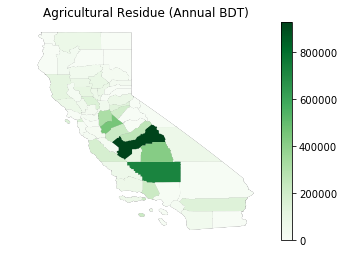

In [7]:
# plotvar = agres['disposal_BDT']


# Map Capacity by County
f, ax = plt.subplots()
CA.plot(ax = ax, color = "white", figsize = (10,10), linewidth=0.2, edgecolor = "black")
agres.plot(ax = ax, column = 'disposal_BDT', cmap = "Greens", legend = True)
ax.axis('off')
ax.set_title('Agricultural Residue (Annual BDT)', fontdict={'fontsize': '12', 'fontweight' : '3'})
plt.savefig(opj(OUT_DIR, "AgResidue.png"), dpi=300)

In [8]:
# manure dataset for plotting
manure = counties[counties['category'] == "manure"]
manure = manure[['COUNTY', 'disposal_BDT', 'wettons']]
manure = pd.merge(CA_shp, manure, on = 'COUNTY')

# manure.head()

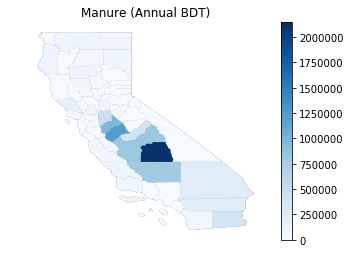

In [9]:
f, ax = plt.subplots()
CA.plot(ax = ax, color = "white", figsize = (10,10), linewidth=0.2, edgecolor = "black")
manure.plot(ax = ax, column = 'disposal_BDT', cmap = "Blues", legend = True)
ax.axis('off')
ax.set_title('Manure (Annual BDT)', fontdict={'fontsize': '12', 'fontweight' : '3'})
# plt.savefig(opj(OUT_DIR, "Manure.png"), dpi=300)

In [10]:
# food and green waste
ofmsw = counties[counties['category'] == "organic fraction municipal solid waste"]

foodwaste = ofmsw[ofmsw['feedstock'] == "FOOD"]
greenwaste = ofmsw[ofmsw['feedstock'] == "GREEN"]

foodwaste = foodwaste[['COUNTY', 'disposal_BDT', 'wettons', 'county_centroid']]
greenwaste = greenwaste[['COUNTY', 'disposal_BDT', 'wettons', 'county_centroid']]


foodwaste.head()

,COUNTY,disposal_BDT,wettons,county_centroid
56,Sierra,108.682987,184.761079,POINT (-120.5160095220462 39.58040534138337)
506,Sacramento,41119.409947,69902.996909,POINT (-121.3442565381238 38.44931988767443)
956,Santa Barbara,12756.549509,21686.134166,POINT (-120.0307987025528 34.5383488895296)
1406,Calaveras,1146.623579,1949.260085,POINT (-120.5541450750406 38.20461192173443)
1856,Ventura,29077.397074,49431.575026,POINT (-119.1260395549243 34.35753335669822)


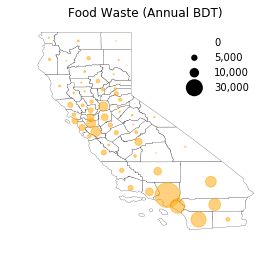

In [11]:
# before plotting prep legend
plotvar = foodwaste['disposal_BDT']

c = []
for i in [10, 45, 65, 85]:
    c.append(int(round(np.percentile(plotvar, i), -3)))

f, ax = plt.subplots()
CA.plot(ax = ax, color = "white", figsize = (10,10), linewidth=0.2, edgecolor = "black")
foodwaste.plot(ax = ax, markersize = foodwaste['disposal_BDT']/500, marker = 'o', 
               color = "Orange", alpha = 0.5, legend = True)
ax.axis('off')
ax.set_title('Food Waste (Annual BDT)', fontdict={'fontsize': '12', 'fontweight' : '3'})

###########

l1 = plt.scatter([],[], s=c[0]/100, edgecolors='none', color = "black")
l2 = plt.scatter([],[], s=c[1]/100, edgecolors='none', color = "black")
l3 = plt.scatter([],[], s=c[2]/100, edgecolors='none', color = "black")
l4 = plt.scatter([],[], s=c[3]/100, edgecolors='none', color = "black")

# labels = [str(c[0]), str(c[1]), str(c[2]), str(c[3])]
labels = ["0", "5,000", "10,000", "30,000"]

leg = plt.legend([l1, l2, l3, l4], labels, ncol = 1, frameon=False, fontsize=10,
handlelength=2, loc = 1, borderpad = 1,
handletextpad=1, title='', scatterpoints = 1)

plt.savefig(opj(OUT_DIR, "FoodWaste.png"), dpi=300)




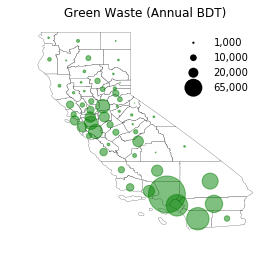

In [12]:
# before plotting prep legend
plotvar = greenwaste['disposal_BDT']

c = []
for i in [10, 45, 65, 85]:
    c.append(int(round(np.percentile(plotvar, i), -3)))


f, ax = plt.subplots()
CA.plot(ax = ax, color = "white", figsize = (10,10), linewidth=0.2, edgecolor = "black")
greenwaste.plot(ax = ax, markersize = plotvar/500, marker = 'o', 
               color = "Green", alpha = 0.5, legend = True)
ax.axis('off')
ax.set_title('Green Waste (Annual BDT)', fontdict={'fontsize': '12', 'fontweight' : '3'})


###########

l1 = plt.scatter([],[], s=c[0]/200, edgecolors='none', color = "black")
l2 = plt.scatter([],[], s=c[1]/200, edgecolors='none', color = "black")
l3 = plt.scatter([],[], s=c[2]/200, edgecolors='none', color = "black")
l4 = plt.scatter([],[], s=c[3]/200, edgecolors='none', color = "black")

# labels = [str(c[0]), str(c[1]), str(c[2]), str(c[3])]
labels = ["1,000", "10,000", "20,000", "65,000"]

leg = plt.legend([l1, l2, l3, l4], labels, ncol = 1, frameon=False, fontsize=10,
handlelength=2, loc = 1, borderpad = 1,
handletextpad=1, title='', scatterpoints = 1)

plt.savefig(opj(OUT_DIR, "GreenWaste.png"), dpi=300)
